In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/Cats-vs-Dogs.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
    )


validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/Test',
    labels='inferred',
    label_mode='int',
    batch_size=32,

    image_size=(256,256)
)

Found 6 files belonging to 2 classes.
Found 6 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#Creating CNN model


model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(1,activation='sigmoid'))














In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_10 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.6902 - accuracy: 0.5000 - val_loss: 1.0510 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 1.3790e-22 - accuracy: 1.0000 - val_loss: 1.5402 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 8.2906e-31 - accuracy: 1.0000 - val_loss: 1.9231 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 9.1776e-35 - accuracy: 1.0000 - val_loss: 2.2091 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 3.1260e-37 - accuracy: 1.0000 - val_loss: 2.4167 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.5590 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.6480 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=

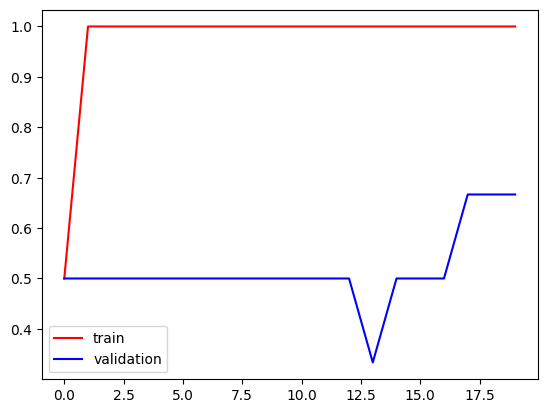

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#need to reduce complexity
#add more data
#reducing complexity

In [ ]:
import cv2

In [ ]:
test_image=cv2.imread('/content/cat.jpg')

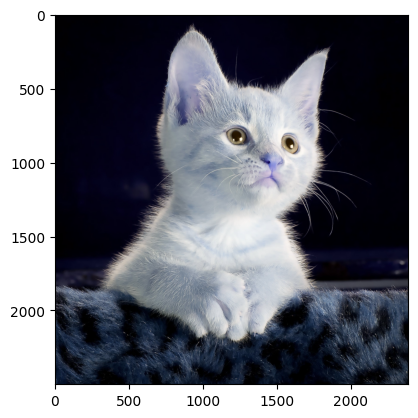

In [ ]:
plt.imshow(test_image)


In [ ]:
test_image.shape

(2500, 2392, 3)

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test_input = test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 159ms/step


array([[0.]], dtype=float32)